In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_excel('data/data_prep.xlsx')

In [58]:
data

,material_type,electronegativity,ionic_radius,core_size,diameter,surface_charge,surface_area,cell_type,concentration,number_of_atoms,...,shape,synthesis_method,surface_charge_type,size_in_water,size_in_medium,zeta_in_medium,no_of_cells,aspect_ratio,pdi,toxicity
0,CuO,1.900,73.0,12.8,313.8,7.6,74.2,1.0,200.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ZnO,1.650,74.0,22.6,114.7,28.8,47.4,0.0,200.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ZnO,1.650,74.0,22.6,114.7,28.8,47.4,0.0,100.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ZnO,1.650,74.0,22.6,69.4,28.8,47.4,1.0,100.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mn2O3,1.550,58.0,51.5,291.7,-46.1,25.9,1.0,200.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,ZnO,2.545,74.0,35.6,236.0,-41.6,27.9,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonToxic
8623,ZnO,2.545,74.0,35.6,236.0,-41.6,27.9,1.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonToxic
8624,ZnO,2.545,74.0,35.6,236.0,-41.6,27.9,1.0,100.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toxic
8625,ZnO,2.545,74.0,35.6,236.0,-41.6,27.9,1.0,0.1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonToxic


In [59]:
data.isna().sum()

material_type                        0
electronegativity                 1806
ionic_radius                      4277
core_size                         7000
diameter                           829
surface_charge                    3258
surface_area                      7000
cell_type                         7000
concentration                      218
number_of_atoms                   4277
molecular_weight                    16
topological_polar_surface_area    5212
a                                 8162
b                                 8161
c                                 8162
alpha                             8161
beta                              8161
gamma                             8161
density                           8161
viability                            0
type                                 0
coat                              6087
cell_line                         1060
cell_line_bin                     1627
human/animal                      1627
animal                   

In [60]:
data[['material_type', 'topological_polar_surface_area']]

,material_type,topological_polar_surface_area
0,CuO,17.1
1,ZnO,17.1
2,ZnO,17.1
3,ZnO,17.1
4,Mn2O3,43.4
...,...,...
8622,ZnO,17.1
8623,ZnO,17.1
8624,ZnO,17.1
8625,ZnO,17.1


### Рассмотрим целевую

In [61]:
data['viability'].describe()

count     8627.000000
mean        99.178374
std       1198.970202
min        -97.000000
25%         59.960000
50%         87.353000
75%         97.600000
max      85775.000000
Name: viability, dtype: float64

In [62]:
data['viability'] = data['viability'].clip(0, 200)

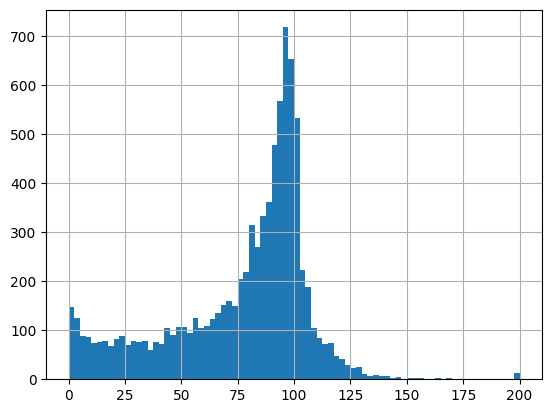

In [63]:
data['viability'].hist(bins=80);

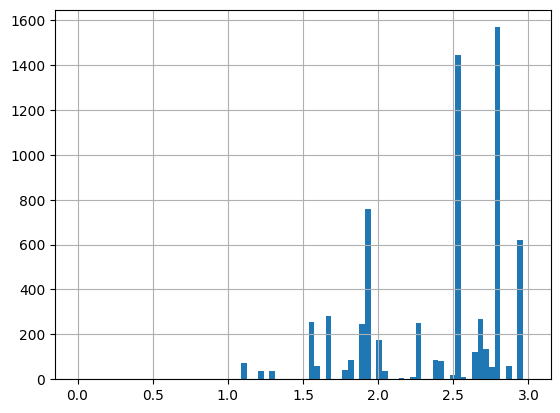

In [64]:
data['electronegativity'] = data['electronegativity'].clip(0, 3)
data['electronegativity'].hist(bins=80);

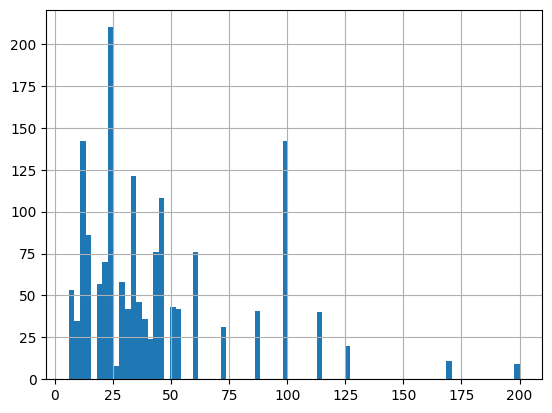

In [65]:
data['core_size'] = data['core_size'].clip(0, 200)
data['core_size'].hist(bins=80);

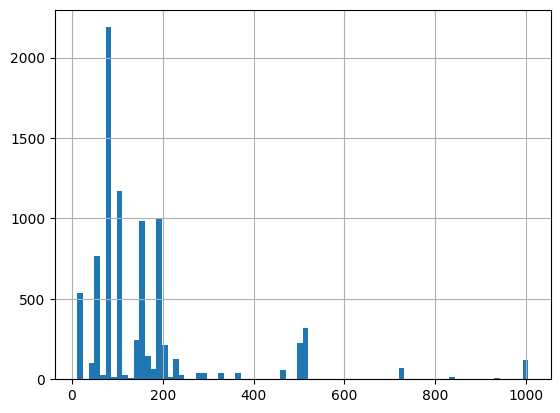

In [66]:
data['molecular_weight'].hist(bins=80);

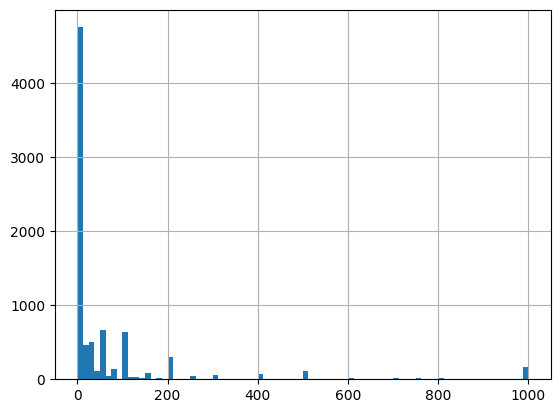

In [67]:
data['concentration'] = data['concentration'].clip(0, 1000)
data['concentration'].hist(bins=80);

### Соотношение органики, неорганики и углерода

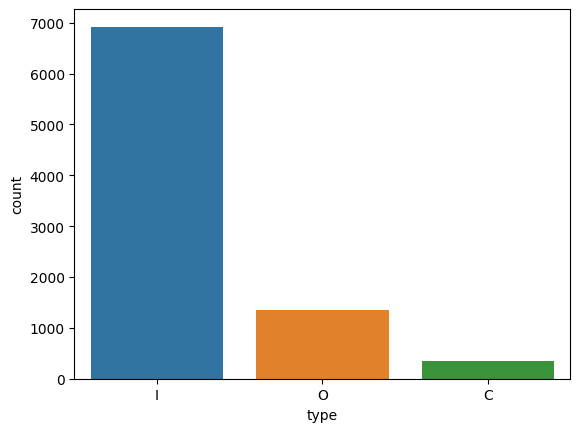

In [68]:
sns.countplot(data=data, x='type');

### Жизнеспособность в разрезе типов

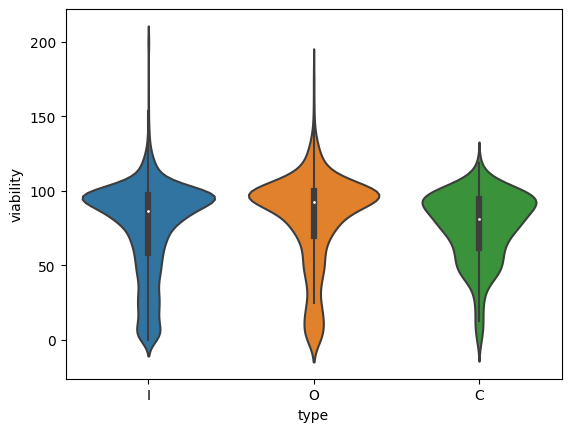

In [69]:
sns.violinplot(data=data, x='type', y='viability');

*В случае с углеродом в среднем жизнеспособность ниже, чем в случае с органикой/неорганикой*

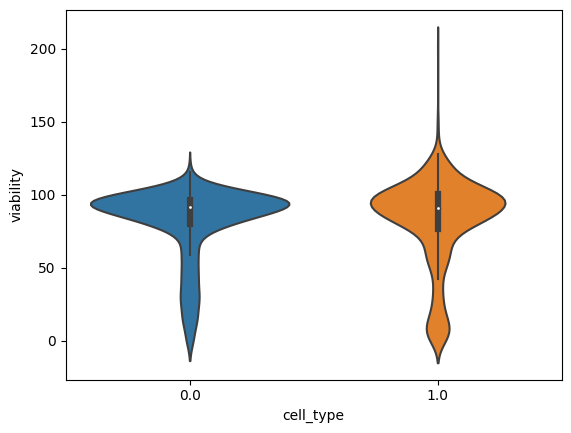

In [70]:
sns.violinplot(data=data, x='cell_type', y='viability');

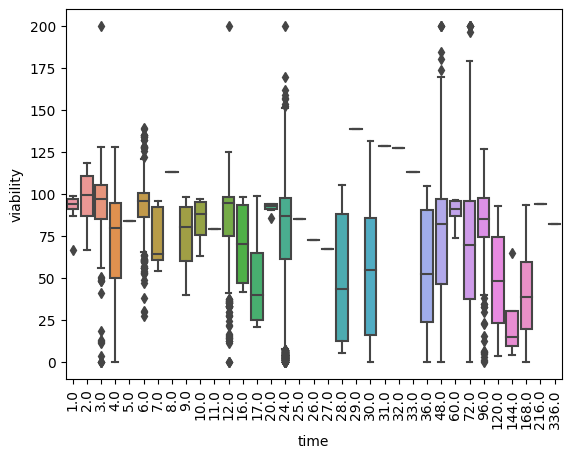

In [71]:
sns.boxplot(data=data, x='time', y='viability')
_ = plt.xticks(rotation=90)

*Чем дольше идет обыт, тем ниже выживаемость*

In [72]:
# data_hist = data[(data['viability']<100) & (data['viability']>0)].viability * -1 + 100

In [73]:
# np.log(data_hist).hist(bins=80)

In [75]:
data.to_excel('data/data_prep_model.xlsx', index=False)

In [76]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
